# Apriori Analysis of Alice in Wonderlands

**Cleaning the data by removing stop words, then translating words in sentence to numeric values**

In [3]:
from nltk.corpus import gutenberg, stopwords
import re

Stop_words = stopwords.words('english')
Sentences = gutenberg.sents('carroll-alice.txt')

TermsSentences = []
for terms in Sentences:
    item_id = 0
    terms = [w for w in terms if w not in Stop_words]
    terms = [w for w in terms if re.search(r'^[a-zA-Z]{2}', w) is not None]
    TermsSentences += [terms]

In [4]:
import numpy as np
Terms_ids = {}
Term_names = {}

sent_rev = []
item_id = 0
Terms_decoded = []
for termSent in TermsSentences:
    sent_rev = []
    for item in termSent:
        if item not in Terms_ids:
            Terms_ids[item] = item_id
            Term_names[item_id] = item
            item_id += 1
        sent_rev += [Terms_ids[item]] 
    Terms_decoded += [sent_rev]

M, N = len(Terms_ids), len(TermsSentences)

Terms = np.arange(0,M)

In [5]:
print(M, N)

2793 1703


In [6]:
# Sanity check
print([Term_names[_] for _ in Terms[0:7]])
print(Terms_decoded[:7])

['Alice', 'Adventures', 'Wonderland', 'Lewis', 'Carroll', 'CHAPTER', 'Down']
[[0, 1, 2, 3, 4], [5], [6, 7, 8], [0, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 13, 19, 20, 21, 22, 18, 23, 0, 24, 20, 25], [26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 7, 50, 51, 52, 53], [54, 15, 55, 56, 0, 57, 55, 58, 59, 60, 7, 61, 62, 63], [62, 63]]


In [7]:
Word_Bool = np.full((N,M), False, dtype=bool)

for i,t in enumerate(Terms_decoded):
    for item in t:
        Word_Bool[i][item] = True

with np.printoptions(threshold=np.inf):
    print(f'{Word_Bool[10:12].astype(int)}')

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
  1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [8]:
import csv

Filename = 'input_for_weka.csv'

with open(Filename, 'w') as fout:
    writer = csv.writer(fout, delimiter=',', quoting=csv.QUOTE_ALL, quotechar="'", lineterminator='\n')
    writer.writerow([Term_names[i] for i in range(M)])
    for i in range(N):
        writer.writerow(list(map(lambda x: '' if x == False else 'True',  Word_Bool[i])))

We will use Apriori analysis to find phrases, or interesting
patterns in a novel.

We will use the nltk library corpus gutenberg API and load the novel 'carroll-alice.txt' which is the
Alice in Wonderland by L. Carroll. There are 1703 sentences in the novel which can be
represented as 1703 transactions. Use any means to parse/extract words and save in CSV
format to be read by Weka framework similar to the Apriori Analysis module.
Hint: Removing stop words and symbols using regular expressions can be helpful:

    from nltk.corpus import gutenberg, stopwords

    Stop_words = stopwords.words('english')

    Sentences = gutenberg.sents('carroll-alice.txt')

    TermsSentences = []

    for terms in Sentences:

        terms = [w for w in terms if w not in Stop_words]
    
        terms = [w for w in terms if re.search(r'^[a-zA-Z]{2}', w) is not None]
    
If Weka picked, use FPGrowth and start with default parameters. Reduce
lowerBoundMinSupport to reach to a sweet point for the support and avoid exploding the
number of rules generated.
Report interesting patterns.
(Example: Some of the frequently occurring phrases are Mock Turtle, White Rabbit, etc.)

------------------------------------------------------------------------------------------------------------------------------------------------------------------

So, after uploading the input_for_weka.csv, we ran a few experiments to find interesting phrases. Setting the rules number to -1, we adjusted the minsupport variable to decreasing values from the default of 0.1. We also changed between ranking the rules from Confidence (which quickly became redundant due to the presence of the word said), and Leverage which is normalizes with respect to the popularity of the item (more robust metric)

***Here are the results:***

=== Run information ===

Scheme:       weka.associations.FPGrowth -P 2 -I -1 -N 10 -T 0 -C 0.9 -D 0.05 -U 1.0 -M 0.01
Relation:     input_for_weka
Instances:    1703
Attributes:   2793
              [list of attributes omitted]
=== Associator model (full training set) ===

FPGrowth found 7 rules (displaying top 7)

1. [Mock=True]: 56 ==> [Turtle=True]: 56   <conf:(1)> lift:(29.36) lev:(0.03) conv:(54.09) 
2. [White=True]: 22 ==> [Rabbit=True]: 22   <conf:(1)> lift:(39.6) lev:(0.01) conv:(21.44) 
3. [Hare=True]: 30 ==> [March=True]: 30   <conf:(1)> lift:(54.94) lev:(0.02) conv:(29.45) 
4. [said=True, Turtle=True]: 32 ==> [Mock=True]: 32   <conf:(1)> lift:(30.41) lev:(0.02) conv:(30.95) 
5. [said=True, Mock=True]: 32 ==> [Turtle=True]: 32   <conf:(1)> lift:(29.36) lev:(0.02) conv:(30.91) 
6. [March=True]: 31 ==> [Hare=True]: 30   <conf:(0.97)> lift:(54.94) lev:(0.02) conv:(15.23) 
7. [Turtle=True]: 58 ==> [Mock=True]: 56   <conf:(0.97)> lift:(29.36) lev:(0.03) conv:(18.7) 

This is with min-support of 0.01. Ranked by confidence, we have a limited set of rules but the most common terms arise here:

    Mock Turtle, Turtle Mock
    White Rabbit
    Hare March, March Hare
    said Mock Turtle, said Turtle Mock

These are mostly very common characters in the play.

=== Run information ===

Scheme:       weka.associations.FPGrowth -P 2 -I -1 -N 50 -T 0 -C 0.9 -D 0.05 -U 1.0 -M 0.002
Relation:     input_for_weka
Instances:    1703
Attributes:   2793
              [list of attributes omitted]
=== Associator model (full training set) ===

FPGrowth found 221 rules (displaying top 50)

 1. [interesting=True]: 5 ==> [said=True]: 5   <conf:(1)> lift:(3.79) lev:(0) conv:(3.68) 
 2. [case=True]: 5 ==> [said=True]: 5   <conf:(1)> lift:(3.79) lev:(0) conv:(3.68) 
 3. [sigh=True]: 4 ==> [said=True]: 4   <conf:(1)> lift:(3.79) lev:(0) conv:(2.95) 
 4. [indignantly=True]: 4 ==> [said=True]: 4   <conf:(1)> lift:(3.79) lev:(0) conv:(2.95) 
 5. [sir=True]: 6 ==> [Alice=True]: 6   <conf:(1)> lift:(4.4) lev:(0) conv:(4.64) 
 6. [curiosity=True]: 5 ==> [Alice=True]: 5   <conf:(1)> lift:(4.4) lev:(0) conv:(3.86) 
 7. [ventured=True]: 4 ==> [Alice=True]: 4   <conf:(1)> lift:(4.4) lev:(0) conv:(3.09) 
 8. [natural=True]: 4 ==> [Alice=True]: 4   <conf:(1)> lift:(4.4) lev:(0) conv:(3.09) 
 9. [golden=True]: 7 ==> [little=True]: 7   <conf:(1)> lift:(15.07) lev:(0) conv:(6.54) 
10. [tiny=True]: 4 ==> [little=True]: 4   <conf:(1)> lift:(15.07) lev:(0) conv:(3.73) 
11. [Mock=True]: 56 ==> [Turtle=True]: 56   <conf:(1)> lift:(29.36) lev:(0.03) conv:(54.09) 
12. [shrill=True]: 5 ==> [voice=True]: 5   <conf:(1)> lift:(36.23) lev:(0) conv:(4.86) 
13. [sobs=True]: 4 ==> [voice=True]: 4   <conf:(1)> lift:(36.23) lev:(0) conv:(3.89) 
14. [White=True]: 22 ==> [Rabbit=True]: 22   <conf:(1)> lift:(39.6) lev:(0.01) conv:(21.44) 
15. [Hare=True]: 30 ==> [March=True]: 30   <conf:(1)> lift:(54.94) lev:(0.02) conv:(29.45) 
16. [gardeners=True]: 7 ==> [three=True]: 7   <conf:(1)> lift:(63.07) lev:(0) conv:(6.89) 
17. [fellow=True]: 4 ==> [old=True]: 4   <conf:(1)> lift:(100.18) lev:(0) conv:(3.96) 
18. [bats=True]: 4 ==> [eat=True]: 4   <conf:(1)> lift:(106.44) lev:(0) conv:(3.96) 
19. [join=True]: 9 ==> [dance=True]: 9   <conf:(1)> lift:(131) lev:(0.01) conv:(8.93) 
20. [bats=True]: 4 ==> [cats=True]: 4   <conf:(1)> lift:(141.92) lev:(0) conv:(3.97) 
21. [kid=True]: 5 ==> [gloves=True]: 5   <conf:(1)> lift:(170.3) lev:(0) conv:(4.97) 
22. [animals=True]: 4 ==> [birds=True]: 4   <conf:(1)> lift:(189.22) lev:(0) conv:(3.98) 
23. [kid=True]: 5 ==> [white=True]: 5   <conf:(1)> lift:(212.88) lev:(0) conv:(4.98) 
24. [oop=True]: 7 ==> [Soo=True]: 7   <conf:(1)> lift:(243.29) lev:(0) conv:(6.97) 
25. [Soo=True]: 7 ==> [oop=True]: 7   <conf:(1)> lift:(243.29) lev:(0) conv:(6.97) 
26. [ootiful=True]: 4 ==> [oop=True]: 4   <conf:(1)> lift:(243.29) lev:(0) conv:(3.98) 
27. [Beau=True]: 4 ==> [oop=True]: 4   <conf:(1)> lift:(243.29) lev:(0) conv:(3.98) 
28. [ootiful=True]: 4 ==> [Soo=True]: 4   <conf:(1)> lift:(243.29) lev:(0) conv:(3.98) 
29. [Beau=True]: 4 ==> [Soo=True]: 4   <conf:(1)> lift:(243.29) lev:(0) conv:(3.98) 
30. [Quadrille=True]: 4 ==> [Lobster=True]: 4   <conf:(1)> lift:(340.6) lev:(0) conv:(3.99) 
31. [yer=True]: 4 ==> [honour=True]: 4   <conf:(1)> lift:(425.75) lev:(0) conv:(3.99) 
32. [honour=True]: 4 ==> [yer=True]: 4   <conf:(1)> lift:(425.75) lev:(0) conv:(3.99) 
33. [ootiful=True]: 4 ==> [Beau=True]: 4   <conf:(1)> lift:(425.75) lev:(0) conv:(3.99) 
34. [Beau=True]: 4 ==> [ootiful=True]: 4   <conf:(1)> lift:(425.75) lev:(0) conv:(3.99) 
35. [Mary=True]: 4 ==> [Ann=True]: 4   <conf:(1)> lift:(425.75) lev:(0) conv:(3.99) 
36. [Ann=True]: 4 ==> [Mary=True]: 4   <conf:(1)> lift:(425.75) lev:(0) conv:(3.99) 
37. [said=True, found=True]: 4 ==> [Alice=True]: 4   <conf:(1)> lift:(4.4) lev:(0) conv:(3.09) 
38. [said=True, sat=True]: 5 ==> [Alice=True]: 5   <conf:(1)> lift:(4.4) lev:(0) conv:(3.86) 
39. [said=True, size=True]: 4 ==> [Alice=True]: 4   <conf:(1)> lift:(4.4) lev:(0) conv:(3.09) 
40. [said=True, certainly=True]: 5 ==> [Alice=True]: 5   <conf:(1)> lift:(4.4) lev:(0) conv:(3.86) 
41. [said=True, afraid=True]: 6 ==> [Alice=True]: 6   <conf:(1)> lift:(4.4) lev:(0) conv:(4.64) 
42. [said=True, glad=True]: 4 ==> [Alice=True]: 4   <conf:(1)> lift:(4.4) lev:(0) conv:(3.09) 
43. [said=True, change=True]: 4 ==> [Alice=True]: 4   <conf:(1)> lift:(4.4) lev:(0) conv:(3.09) 
44. [said=True, feel=True]: 4 ==> [Alice=True]: 4   <conf:(1)> lift:(4.4) lev:(0) conv:(3.09) 
45. [said=True, sir=True]: 4 ==> [Alice=True]: 4   <conf:(1)> lift:(4.4) lev:(0) conv:(3.09) 
46. [King=True, must=True]: 6 ==> [said=True]: 6   <conf:(1)> lift:(3.79) lev:(0) conv:(4.42) 
47. [said=True, Turtle=True]: 32 ==> [Mock=True]: 32   <conf:(1)> lift:(30.41) lev:(0.02) conv:(30.95) 
48. [said=True, Mock=True]: 32 ==> [Turtle=True]: 32   <conf:(1)> lift:(29.36) lev:(0.02) conv:(30.91) 
49. [said=True, White=True]: 9 ==> [Rabbit=True]: 9   <conf:(1)> lift:(39.6) lev:(0.01) conv:(8.77) 
50. [said=True, Hare=True]: 15 ==> [March=True]: 15   <conf:(1)> lift:(54.94) lev:(0.01) conv:(14.73) 



Here, min-support is 0.002. Ranked by confidence.

This result is sorted by confidence, and honestly, the top 50 of the 221 result all show high confidence, so the nature of the results we see here is questionable, however we do see some of the common words the author uses and we also see these new recurring terms:

    Marry Ann
    Quadrille Lobster
    yer honour
    Beau ootiful Soo oop
    sir Alice
    curiosity Alice
    ventured Alice
    natural Alice
    golden Little
    Tiny Little

More interestingly, ranking the result by lift proved a bit more productive.

=== Run information ===

Scheme:       weka.associations.FPGrowth -P 2 -I -1 -N 50 -T 1 -C 0.9 -D 0.05 -U 1.0 -M 0.002
Relation:     input_for_weka
Instances:    1703
Attributes:   2793
              [list of attributes omitted]
=== Associator model (full training set) ===

FPGrowth found 4256 rules (displaying top 50)

 1. [yer=True]: 4 ==> [honour=True]: 4   conf:(1) <lift:(425.75)> lev:(0) conv:(3.99) 
 2. [honour=True]: 4 ==> [yer=True]: 4   conf:(1) <lift:(425.75)> lev:(0) conv:(3.99) 
 3. [ootiful=True]: 4 ==> [Beau=True]: 4   conf:(1) <lift:(425.75)> lev:(0) conv:(3.99) 
 4. [Beau=True]: 4 ==> [ootiful=True]: 4   conf:(1) <lift:(425.75)> lev:(0) conv:(3.99) 
 5. [Mary=True]: 4 ==> [Ann=True]: 4   conf:(1) <lift:(425.75)> lev:(0) conv:(3.99) 
 6. [Ann=True]: 4 ==> [Mary=True]: 4   conf:(1) <lift:(425.75)> lev:(0) conv:(3.99) 
 7. [eat=True, cats=True]: 4 ==> [bats=True]: 4   conf:(1) <lift:(425.75)> lev:(0) conv:(3.99) 
 8. [bats=True]: 4 ==> [eat=True, cats=True]: 4   conf:(1) <lift:(425.75)> lev:(0) conv:(3.99) 
 9. [ootiful=True]: 4 ==> [oop=True, Beau=True]: 4   conf:(1) <lift:(425.75)> lev:(0) conv:(3.99) 
10. [oop=True, ootiful=True]: 4 ==> [Beau=True]: 4   conf:(1) <lift:(425.75)> lev:(0) conv:(3.99) 
11. [Beau=True]: 4 ==> [oop=True, ootiful=True]: 4   conf:(1) <lift:(425.75)> lev:(0) conv:(3.99) 
12. [oop=True, Beau=True]: 4 ==> [ootiful=True]: 4   conf:(1) <lift:(425.75)> lev:(0) conv:(3.99) 
13. [ootiful=True]: 4 ==> [Soo=True, Beau=True]: 4   conf:(1) <lift:(425.75)> lev:(0) conv:(3.99) 
14. [Soo=True, ootiful=True]: 4 ==> [Beau=True]: 4   conf:(1) <lift:(425.75)> lev:(0) conv:(3.99) 
15. [Beau=True]: 4 ==> [Soo=True, ootiful=True]: 4   conf:(1) <lift:(425.75)> lev:(0) conv:(3.99) 
16. [Soo=True, Beau=True]: 4 ==> [ootiful=True]: 4   conf:(1) <lift:(425.75)> lev:(0) conv:(3.99) 
17. [ootiful=True]: 4 ==> [oop=True, Soo=True, Beau=True]: 4   conf:(1) <lift:(425.75)> lev:(0) conv:(3.99) 
18. [oop=True, ootiful=True]: 4 ==> [Soo=True, Beau=True]: 4   conf:(1) <lift:(425.75)> lev:(0) conv:(3.99) 
19. [Soo=True, ootiful=True]: 4 ==> [oop=True, Beau=True]: 4   conf:(1) <lift:(425.75)> lev:(0) conv:(3.99) 
20. [oop=True, Soo=True, ootiful=True]: 4 ==> [Beau=True]: 4   conf:(1) <lift:(425.75)> lev:(0) conv:(3.99) 
21. [Beau=True]: 4 ==> [oop=True, Soo=True, ootiful=True]: 4   conf:(1) <lift:(425.75)> lev:(0) conv:(3.99) 
22. [oop=True, Beau=True]: 4 ==> [Soo=True, ootiful=True]: 4   conf:(1) <lift:(425.75)> lev:(0) conv:(3.99) 
23. [Soo=True, Beau=True]: 4 ==> [oop=True, ootiful=True]: 4   conf:(1) <lift:(425.75)> lev:(0) conv:(3.99) 
24. [oop=True, Soo=True, Beau=True]: 4 ==> [ootiful=True]: 4   conf:(1) <lift:(425.75)> lev:(0) conv:(3.99) 
25. [Lobster=True]: 5 ==> [Quadrille=True]: 4   conf:(0.8) <lift:(340.6)> lev:(0) conv:(2.49) 
26. [Quadrille=True]: 4 ==> [Lobster=True]: 4   conf:(1) <lift:(340.6)> lev:(0) conv:(3.99) 
27. [gloves=True, white=True]: 5 ==> [kid=True]: 5   conf:(1) <lift:(340.6)> lev:(0) conv:(4.99) 
28. [kid=True]: 5 ==> [gloves=True, white=True]: 5   conf:(1) <lift:(340.6)> lev:(0) conv:(4.99) 
29. [fan=True, white=True]: 4 ==> [kid=True]: 4   conf:(1) <lift:(340.6)> lev:(0) conv:(3.99) 
30. [kid=True]: 5 ==> [fan=True, white=True]: 4   conf:(0.8) <lift:(340.6)> lev:(0) conv:(2.49) 
31. [say=True, well=True]: 5 ==> [You=True, might=True]: 4   conf:(0.8) <lift:(340.6)> lev:(0) conv:(2.49) 
32. [You=True, might=True]: 4 ==> [say=True, well=True]: 4   conf:(1) <lift:(340.6)> lev:(0) conv:(3.99) 
33. [gloves=True, white=True]: 5 ==> [fan=True, kid=True]: 4   conf:(0.8) <lift:(340.6)> lev:(0) conv:(2.49) 
34. [fan=True, white=True]: 4 ==> [gloves=True, kid=True]: 4   conf:(1) <lift:(340.6)> lev:(0) conv:(3.99) 
35. [gloves=True, fan=True, white=True]: 4 ==> [kid=True]: 4   conf:(1) <lift:(340.6)> lev:(0) conv:(3.99) 
36. [kid=True]: 5 ==> [gloves=True, fan=True, white=True]: 4   conf:(0.8) <lift:(340.6)> lev:(0) conv:(2.49) 
37. [gloves=True, kid=True]: 5 ==> [fan=True, white=True]: 4   conf:(0.8) <lift:(340.6)> lev:(0) conv:(2.49) 
38. [fan=True, kid=True]: 4 ==> [gloves=True, white=True]: 4   conf:(1) <lift:(340.6)> lev:(0) conv:(3.99) 
39. [You=True, well=True]: 6 ==> [say=True, might=True]: 4   conf:(0.67) <lift:(283.83)> lev:(0) conv:(2) 
40. [say=True, might=True]: 4 ==> [You=True, well=True]: 4   conf:(1) <lift:(283.83)> lev:(0) conv:(3.99) 
41. [oop=True]: 7 ==> [Soo=True]: 7   conf:(1) <lift:(243.29)> lev:(0) conv:(6.97) 
42. [Soo=True]: 7 ==> [oop=True]: 7   conf:(1) <lift:(243.29)> lev:(0) conv:(6.97) 
43. [ootiful=True]: 4 ==> [oop=True]: 4   conf:(1) <lift:(243.29)> lev:(0) conv:(3.98) 
44. [Beau=True]: 4 ==> [oop=True]: 4   conf:(1) <lift:(243.29)> lev:(0) conv:(3.98) 
45. [ootiful=True]: 4 ==> [Soo=True]: 4   conf:(1) <lift:(243.29)> lev:(0) conv:(3.98) 
46. [Beau=True]: 4 ==> [Soo=True]: 4   conf:(1) <lift:(243.29)> lev:(0) conv:(3.98) 
47. [ootiful=True]: 4 ==> [oop=True, Soo=True]: 4   conf:(1) <lift:(243.29)> lev:(0) conv:(3.98) 
48. [oop=True, ootiful=True]: 4 ==> [Soo=True]: 4   conf:(1) <lift:(243.29)> lev:(0) conv:(3.98) 
49. [Soo=True, ootiful=True]: 4 ==> [oop=True]: 4   conf:(1) <lift:(243.29)> lev:(0) conv:(3.98) 
50. [Beau=True]: 4 ==> [oop=True, Soo=True]: 4   conf:(1) <lift:(243.29)> lev:(0) conv:(3.98) 

Here min support is 8E-4 ranked by lift

We see new phrases

    eat bats
    bats eat cats
    gloves kid
    You might say well

I ranked the results by conviction as well... Conviction ranks results by how strong these linked terms are to each other. ie. If conviction is greater than 1, then this metric shows that incorrect predictions occur less often than if these two actions were independent.

=== Run information ===

Scheme:       weka.associations.FPGrowth -P 2 -I -1 -N 50 -T 3 -C 0.9 -D 0.05 -U 1.0 -M 8.0E-4
Relation:     input_for_weka
Instances:    1703
Attributes:   2793
              [list of attributes omitted]
=== Associator model (full training set) ===

FPGrowth found 674089 rules (displaying top 50)

 1. [Mock=True]: 56 ==> [Turtle=True]: 56   conf:(1) lift:(29.36) lev:(0.03) <conv:(54.09)> 
 2. [said=True, Turtle=True]: 32 ==> [Mock=True]: 32   conf:(1) lift:(30.41) lev:(0.02) <conv:(30.95)> 
 3. [said=True, Mock=True]: 32 ==> [Turtle=True]: 32   conf:(1) lift:(29.36) lev:(0.02) <conv:(30.91)> 
 4. [Hare=True]: 30 ==> [March=True]: 30   conf:(1) lift:(54.94) lev:(0.02) <conv:(29.45)> 
 5. [White=True]: 22 ==> [Rabbit=True]: 22   conf:(1) lift:(39.6) lev:(0.01) <conv:(21.44)> 
 6. [Turtle=True]: 58 ==> [Mock=True]: 56   conf:(0.97) lift:(29.36) lev:(0.03) <conv:(18.7)> 
 7. [March=True]: 31 ==> [Hare=True]: 30   conf:(0.97) lift:(54.94) lev:(0.02) <conv:(15.23)> 
 8. [said=True, Hare=True]: 15 ==> [March=True]: 15   conf:(1) lift:(54.94) lev:(0.01) <conv:(14.73)> 
 9. [join=True]: 9 ==> [dance=True]: 9   conf:(1) lift:(131) lev:(0.01) <conv:(8.93)> 
10. [said=True, White=True]: 9 ==> [Rabbit=True]: 9   conf:(1) lift:(39.6) lev:(0.01) <conv:(8.77)> 
11. [said=True, March=True]: 16 ==> [Hare=True]: 15   conf:(0.94) lift:(53.22) lev:(0.01) <conv:(7.86)> 
12. [Turtle=True, Gryphon=True]: 8 ==> [Mock=True]: 8   conf:(1) lift:(30.41) lev:(0) <conv:(7.74)> 
13. [Mock=True, Gryphon=True]: 8 ==> [Turtle=True]: 8   conf:(1) lift:(29.36) lev:(0) <conv:(7.73)> 
14. [oop=True]: 7 ==> [Soo=True]: 7   conf:(1) lift:(243.29) lev:(0) <conv:(6.97)> 
15. [Soo=True]: 7 ==> [oop=True]: 7   conf:(1) lift:(243.29) lev:(0) <conv:(6.97)> 
16. [gardeners=True]: 7 ==> [three=True]: 7   conf:(1) lift:(63.07) lev:(0) <conv:(6.89)> 
17. [golden=True]: 7 ==> [little=True]: 7   conf:(1) lift:(15.07) lev:(0) <conv:(6.54)> 
18. [table=True, glass=True]: 7 ==> [little=True]: 7   conf:(1) lift:(15.07) lev:(0) <conv:(6.54)> 
19. [Hatter=True, March=True]: 6 ==> [Hare=True]: 6   conf:(1) lift:(56.77) lev:(0) <conv:(5.89)> 
20. [Hatter=True, Hare=True]: 6 ==> [March=True]: 6   conf:(1) lift:(54.94) lev:(0) <conv:(5.89)> 
21. [Alice=True, White=True]: 6 ==> [Rabbit=True]: 6   conf:(1) lift:(39.6) lev:(0) <conv:(5.85)> 
22. [Alice=True, Turtle=True]: 6 ==> [Mock=True]: 6   conf:(1) lift:(30.41) lev:(0) <conv:(5.8)> 
23. [went=True, Turtle=True]: 6 ==> [Mock=True]: 6   conf:(1) lift:(30.41) lev:(0) <conv:(5.8)> 
24. [would=True, Turtle=True]: 6 ==> [Mock=True]: 6   conf:(1) lift:(30.41) lev:(0) <conv:(5.8)> 
25. [Turtle=True, course=True]: 6 ==> [Mock=True]: 6   conf:(1) lift:(30.41) lev:(0) <conv:(5.8)> 
26. [Alice=True, Mock=True]: 6 ==> [Turtle=True]: 6   conf:(1) lift:(29.36) lev:(0) <conv:(5.8)> 
27. [The=True, Mock=True]: 6 ==> [Turtle=True]: 6   conf:(1) lift:(29.36) lev:(0) <conv:(5.8)> 
28. [went=True, Mock=True]: 6 ==> [Turtle=True]: 6   conf:(1) lift:(29.36) lev:(0) <conv:(5.8)> 
29. [would=True, Mock=True]: 6 ==> [Turtle=True]: 6   conf:(1) lift:(29.36) lev:(0) <conv:(5.8)> 
30. [Mock=True, course=True]: 6 ==> [Turtle=True]: 6   conf:(1) lift:(29.36) lev:(0) <conv:(5.8)> 
31. [key=True, golden=True]: 6 ==> [little=True]: 6   conf:(1) lift:(15.07) lev:(0) <conv:(5.6)> 
32. [Of=True]: 11 ==> [course=True]: 10   conf:(0.91) lift:(64.51) lev:(0.01) <conv:(5.42)> 
33. [gloves=True, white=True]: 5 ==> [kid=True]: 5   conf:(1) lift:(340.6) lev:(0) <conv:(4.99)> 
34. [kid=True]: 5 ==> [gloves=True, white=True]: 5   conf:(1) lift:(340.6) lev:(0) <conv:(4.99)> 
35. [door=True, golden=True]: 5 ==> [little=True, key=True]: 5   conf:(1) lift:(243.29) lev:(0) <conv:(4.98)> 
36. [kid=True]: 5 ==> [white=True]: 5   conf:(1) lift:(212.88) lev:(0) <conv:(4.98)> 
37. [gloves=True, kid=True]: 5 ==> [white=True]: 5   conf:(1) lift:(212.88) lev:(0) <conv:(4.98)> 
38. [door=True, golden=True]: 5 ==> [key=True]: 5   conf:(1) lift:(189.22) lev:(0) <conv:(4.97)> 
39. [little=True, door=True, golden=True]: 5 ==> [key=True]: 5   conf:(1) lift:(189.22) lev:(0) <conv:(4.97)> 
40. [kid=True]: 5 ==> [gloves=True]: 5   conf:(1) lift:(170.3) lev:(0) <conv:(4.97)> 
41. [white=True, kid=True]: 5 ==> [gloves=True]: 5   conf:(1) lift:(170.3) lev:(0) <conv:(4.97)> 
42. [Alice=True, March=True]: 5 ==> [Hare=True]: 5   conf:(1) lift:(56.77) lev:(0) <conv:(4.91)> 
43. [Alice=True, Hare=True]: 5 ==> [March=True]: 5   conf:(1) lift:(54.94) lev:(0) <conv:(4.91)> 
44. [looking=True, minute=True]: 5 ==> [two=True]: 5   conf:(1) lift:(54.94) lev:(0) <conv:(4.91)> 
45. [The=True, White=True]: 5 ==> [Rabbit=True]: 5   conf:(1) lift:(39.6) lev:(0) <conv:(4.87)> 
46. [shrill=True]: 5 ==> [voice=True]: 5   conf:(1) lift:(36.23) lev:(0) <conv:(4.86)> 
47. [Queen=True, Turtle=True]: 5 ==> [Mock=True]: 5   conf:(1) lift:(30.41) lev:(0) <conv:(4.84)> 
48. [Turtle=True, voice=True]: 5 ==> [Mock=True]: 5   conf:(1) lift:(30.41) lev:(0) <conv:(4.84)> 
49. [said=True, Turtle=True, course=True]: 5 ==> [Mock=True]: 5   conf:(1) lift:(30.41) lev:(0) <conv:(4.84)> 
50. [Queen=True, Mock=True]: 5 ==> [Turtle=True]: 5   conf:(1) lift:(29.36) lev:(0) <conv:(4.83)> 

    said Hare March
    join Dance
    said Turtle Mock
    said Mock Turtle

    Also characters around other characters: 
    Mock Turtle and Gryphon
    Hatter and March Hare
    three gardners

    commonly used phrases like
    shrill voice
    and the Queen associated with the Mock turtle

Overall we learned a lot more by maximizing our rules, and filtering based on other metrics aside from Confidence. We used Lift which was already covered in class and conviction as metrics as well.

-----------------------------------------

# Part 2:

NeuralNetMLP is a single hidden layer neural
network implementation. Make the necessary modifications to upgrade it to a 2 hidden
layer network. Run it on the MNIST dataset and report its performance

In [9]:
def load_mnist(path, kind='train'):
    from numpy import fromfile, uint8
    import os
    import struct
    
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte' % kind)
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = fromfile(lbpath, dtype=uint8)
        with open(images_path, 'rb') as imgpath:
            magic, num, rows, cols = struct.unpack(">IIII",imgpath.read(16))
            images = fromfile(imgpath, dtype=uint8).reshape(len(labels), 784)
            images = ((images / 255.) - .5) * 2
    return images, labels

X_train_mnist, y_train_mnist = load_mnist('./EP_datasets/mnist/', kind='train')
print(f'Rows= {X_train_mnist.shape[0]}, columns= {X_train_mnist.shape[1]}')

X_test_mnist, y_test_mnist = load_mnist('./EP_datasets/mnist/', kind='t10k')
print(f'Rows= {X_test_mnist.shape[0]}, columns= {X_test_mnist.shape[1]}')

Rows= 60000, columns= 784
Rows= 10000, columns= 784


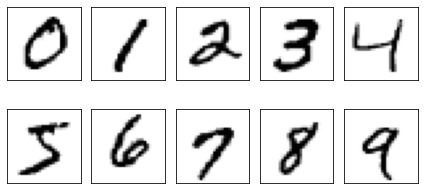

In [10]:
import matplotlib.pyplot as plt

_, ax = plt.subplots(nrows=2, ncols=5, sharex='all', sharey='all', dpi=72)
ax = ax.flatten()
for img_i in range(10):
    img = X_train_mnist[y_train_mnist == img_i][0].reshape(28, 28)
    ax[img_i].imshow(img, cmap='Greys')
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.tight_layout()
plt.show()

In [19]:
from sklearn.metrics import confusion_matrix

def get_acc(_y_test, _y_pred):
    return (np.sum(_y_test == _y_pred)).astype(float) / _y_test.shape[0]

***First Let's see the performance of a single hidden layer MLP***

In [20]:
class NeuralNetMLP(object):

    def __init__(self, n_hidden=30, epochs=100, eta=0.001, minibatch_size=1, seed=None):
        self.random = np.random.RandomState(seed)  # used to randomize weights
        self.n_hidden = n_hidden  # size of the hidden layer
        self.epochs = epochs  # number of iterations
        self.eta = eta  # learning rate
        self.minibatch_size = minibatch_size  # size of training batch - 1 would not work
        self.w_out, self.w_h = None, None
    
    @staticmethod
    def onehot(_y, _n_classes):  # one hot encode the input class y
        onehot = np.zeros((_n_classes, _y.shape[0]))
        for idx, val in enumerate(_y.astype(int)):
            onehot[val, idx] = 1.0
        return onehot.T
    
    @staticmethod
    def sigmoid(_z):  # Eq 1
        return 1.0 / (1.0 + np.exp(-np.clip(_z, -250, 250)))

    def _forward(self, _X):  # Eq 2
        z_h = np.dot(_X, self.w_h)
        a_h = self.sigmoid(z_h)
        z_out = np.dot(a_h, self.w_out)
        a_out = self.sigmoid(z_out)
        return z_h, a_h, z_out, a_out

    @staticmethod
    def compute_cost(y_enc, output):  # Eq 4
        term1 = -y_enc * (np.log(output))
        term2 = (1.0-y_enc) * np.log(1.0-output)
        cost = np.sum(term1 - term2)
        return cost

    def predict(self, _X):
        z_h, a_h, z_out, a_out = self._forward(_X)
        ypred = np.argmax(z_out, axis=1)
        return ypred

    def fit(self, _X_train, _y_train, _X_valid, _y_valid):
        import sys
        n_output = np.unique(_y_train).shape[0]  # number of class labels
        n_features = _X_train.shape[1]
        self.w_out = self.random.normal(loc=0.0, scale=0.1, size=(self.n_hidden, n_output))
        self.w_h = self.random.normal(loc=0.0, scale=0.1, size=(n_features, self.n_hidden))
        self.eval_ = {'cost': [], 'train_acc':[], 'valid_acc':[]}
        y_train_enc = self.onehot(_y_train, n_output)  # one-hot encode original y
        for ei in range(self.epochs):  # Ideally must shuffle at every epoch
            indices = np.arange(_X_train.shape[0])
            for start_idx in range(0, indices.shape[0] - self.minibatch_size + 1, self.minibatch_size):
                batch_idx = indices[start_idx:start_idx + self.minibatch_size]
                
                z_h, a_h, z_out, a_out = self._forward(_X_train[batch_idx])  # neural network model
                
                sigmoid_derivative_h = a_h * (1.0-a_h)  # Eq 3
                delta_out = a_out - y_train_enc[batch_idx]  # Eq 5
                delta_h = (np.dot(delta_out, self.w_out.T) * sigmoid_derivative_h)  # Eq 6
                grad_w_out = np.dot(a_h.T, delta_out)  # Eq 7
                grad_w_h = np.dot(_X_train[batch_idx].T, delta_h)  # Eq 8
                self.w_out -= self.eta*grad_w_out  # Eq 9
                self.w_h -= self.eta*grad_w_h  # Eq 9

            # Evaluation after each epoch during training
            z_h, a_h, z_out, a_out = self._forward(_X_train)
            cost = self.compute_cost(y_enc=y_train_enc, output=a_out)
            y_train_pred = self.predict(_X_train)  # monitoring training progress through reclassification
            y_valid_pred = self.predict(_X_valid)  # monitoring training progress through validation
            train_acc = ((np.sum(_y_train == y_train_pred)).astype(float) / _X_train.shape[0])
            valid_acc = ((np.sum(_y_valid == y_valid_pred)).astype(float) / _X_valid.shape[0])
            sys.stderr.write('\r%d/%d | Cost: %.2f ' '| Train/Valid Acc.: %.2f%%/%.2f%% '%
                (ei+1, self.epochs, cost, train_acc*100, valid_acc*100))
            sys.stderr.flush()
            
            self.eval_['cost'].append(cost)
            self.eval_['train_acc'].append(train_acc)
            self.eval_['valid_acc'].append(valid_acc)
        return self

In [21]:
# Define and fit the neural network
nn = NeuralNetMLP(n_hidden=20, epochs=300, eta=0.0005, minibatch_size=100, seed=1)

nn.fit(X_train_mnist[:55000], y_train_mnist[:55000], X_train_mnist[55000:], y_train_mnist[55000:]) ;

300/300 | Cost: 15436.03 | Train/Valid Acc.: 96.21%/95.50% 

In [22]:
y_pred = nn.predict(X_test_mnist)

print(f'Accuracy= {get_acc(y_test_mnist, y_pred)*100:.2f}%')
print(confusion_matrix(y_test_mnist, y_pred))

Accuracy= 94.12%
[[ 959    0    1    0    4    1    9    1    5    0]
 [   0 1100    3    2    1    0    5    1   23    0]
 [  14    0  961   13    4    0    9   11   20    0]
 [   2    3   13  955    0   13    1    7   10    6]
 [   0    2    2    1  937    1    5    6    4   24]
 [   8    5    2   39    6  775   13    9   27    8]
 [  13    4    4    0    6   14  903    1   13    0]
 [   3    6   13    7    3    0    0  980    4   12]
 [   3    4    6   12    9    6    5   11  915    3]
 [   4    5    0   17   24    4    1   21    6  927]]


***Now, we implement our 2-hidden layer MLP (deep neural network). To make note of here, I updated the feed forward method first, keeping track of what the inputs and outputs were. Also the weight matrix for w_h1 (second hidden layer), must be a different size from the first, since the first deals with the input data (n_features) as dimension, while the second will have it's dot product taken by two matrices with the same dimension as the self.n_hidden, thus the second weight matrix must be self.n_hidden x self.n_hidden***

This is because the number of rows must equal to the number of neurons in the previous layer:
(n_features of input layer for h1, n_hidden for h2, n_hidden for output)

The number of columns must equal to the number of neurons in the current layer (n_hidden for h1 matching the number of neurons in h1, n_hidden for h2 matching number of neurons for h2, n_output for output matching the output)

In [23]:
class NeuralNetMLP2(object):

    def __init__(self, n_hidden=30, epochs=100, eta=0.001, minibatch_size=1, seed=None):
        self.random = np.random.RandomState(seed)  # used to randomize weights
        self.n_hidden = n_hidden  # size of the hidden layer
        self.epochs = epochs  # number of iterations
        self.eta = eta  # learning rate
        self.minibatch_size = minibatch_size  # size of training batch - 1 would not work
        self.w_out, self.w_h, self.w_h1 = None, None, None
    
    #@staticmethod
    def onehot(self, _y, _n_classes):  # one hot encode the input class y
        onehot = np.zeros((_n_classes, _y.shape[0]))
        for idx, val in enumerate(_y.astype(int)):
            onehot[val, idx] = 1.0
        return onehot.T
    
    #@staticmethod
    def sigmoid(self,_z):  # Eq 1
        return 1.0 / (1.0 + np.exp(-np.clip(_z, -250, 250)))

    def _forward(self, _X):  # Eq 2
        #net input of hidden layer 1
        z_h = np.dot(_X, self.w_h)
        #activation of hidden layer 1
        a_h = self.sigmoid(z_h)
        
        #net input of hidden layer 2
        z_h1 = np.dot(a_h, self.w_h1)
        a_h1 = self.sigmoid(z_h1)
        
        z_out = np.dot(a_h1, self.w_out)
        a_out = self.sigmoid(z_out)
        return z_h, a_h, z_h1, a_h1, z_out, a_out

    @staticmethod
    def compute_cost(y_enc, output):  # Eq 4
        term1 = -y_enc * (np.log(output))
        term2 = (1.0-y_enc) * np.log(1.0-output)
        cost = np.sum(term1 - term2)
        return cost

    def predict(self, _X):
        z_h, a_h, z_h1, a_h1, z_out, a_out = self._forward(_X)
        ypred = np.argmax(z_out, axis=1)
        return ypred

    def fit(self, _X_train, _y_train, _X_valid, _y_valid):
        import sys
        n_output = np.unique(_y_train).shape[0]  # number of class labels
        n_features = _X_train.shape[1]
        self.w_out = self.random.normal(loc=0.0, scale=0.1, size=(self.n_hidden, n_output))
        self.w_h = self.random.normal(loc=0.0, scale=0.1, size=(n_features, self.n_hidden))
        self.w_h1 = self.random.normal(loc=0.0, scale=0.1, size=(self.n_hidden, self.n_hidden))
        self.eval_ = {'cost': [], 'train_acc':[], 'valid_acc':[]}
        y_train_enc = self.onehot(_y_train, n_output)  # one-hot encode original y
        for ei in range(self.epochs):  # Ideally must shuffle at every epoch
            indices = np.arange(_X_train.shape[0])
            for start_idx in range(0, indices.shape[0] - self.minibatch_size + 1, self.minibatch_size):
                batch_idx = indices[start_idx:start_idx + self.minibatch_size]
                
                z_h, a_h, z_h1, a_h1, z_out, a_out = self._forward(_X_train[batch_idx])  # neural network model
                
                #back propagation
                delta_out = a_out - y_train_enc[batch_idx]  # Eq 5 error of the output layer
                sigmoid_derivative_h1 = a_h1 * (1.0-a_h1)  # Eq 3 derivative of second layer
                delta_h1 = (np.dot(delta_out, self.w_out.T) * sigmoid_derivative_h1)  # Eq 6 layer error matrix of the second hidden layer
                sigmoid_derivative_h = a_h * (1.0-a_h)
                delta_h = (np.dot(delta_h1, self.w_h1.T) * sigmoid_derivative_h)
                
                grad_w_out = np.dot(a_h1.T, delta_out)  # Eq 7
                grad_w_h1 = np.dot(a_h.T, delta_h1)  # Eq 8
                grad_w_h = np.dot(_X_train[batch_idx].T, delta_h)
                
                
                self.w_out -= self.eta*grad_w_out  # Eq 9
                self.w_h -= self.eta*grad_w_h  # Eq 9
                self.w_h1 -= self.eta*grad_w_h1

            # Evaluation after each epoch during training
            z_h, a_h, z_h1, a_h1, z_out, a_out = self._forward(_X_train)
            cost = self.compute_cost(y_enc=y_train_enc, output=a_out)
            y_train_pred = self.predict(_X_train)  # monitoring training progress through reclassification
            y_valid_pred = self.predict(_X_valid)  # monitoring training progress through validation
            train_acc = ((np.sum(_y_train == y_train_pred)).astype(float) / _X_train.shape[0])
            valid_acc = ((np.sum(_y_valid == y_valid_pred)).astype(float) / _X_valid.shape[0])
            sys.stderr.write('\r%d/%d | Cost: %.2f ' '| Train/Valid Acc.: %.2f%%/%.2f%% '%
                (ei+1, self.epochs, cost, train_acc*100, valid_acc*100))
            sys.stderr.flush()
            
            self.eval_['cost'].append(cost)
            self.eval_['train_acc'].append(train_acc)
            self.eval_['valid_acc'].append(valid_acc)
        return self

In [24]:
# Define and fit the neural network
nn2 = NeuralNetMLP2(n_hidden=20, epochs=300, eta=0.0005, minibatch_size=100, seed=1)

nn2.fit(X_train_mnist[:55000], y_train_mnist[:55000], X_train_mnist[55000:], y_train_mnist[55000:]) ;

300/300 | Cost: 7849.39 | Train/Valid Acc.: 98.05%/95.74%  

In [25]:
y_pred2 = nn2.predict(X_test_mnist)

print(f'Accuracy= {get_acc(y_test_mnist, y_pred2)*100:.2f}%')
print(confusion_matrix(y_test_mnist, y_pred2))

Accuracy= 94.82%
[[ 957    0    1    1    0    3    7    3    6    2]
 [   0 1106    7    1    0    1    3    3   14    0]
 [  10    2  971   11    5    0    3    9   21    0]
 [   0    1   18  954    0   13    0   11   10    3]
 [   2    0    4    2  936    0    7    5    1   25]
 [   8    1    1   29    3  820   11    3   11    5]
 [   9    3    6    0   10   10  918    0    2    0]
 [   1    5   11   14   11    0    0  976    2    8]
 [   5    2    6   16    6    7    5    7  913    7]
 [   5    4    1   14   36    1    1   10    6  931]]


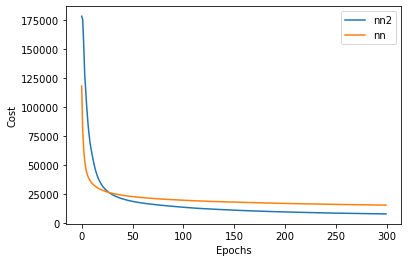

In [29]:
import matplotlib.pyplot as plt
plt.plot(range(nn2.epochs), nn2.eval_['cost'])
plt.plot(range(nn.epochs), nn.eval_['cost'])
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.legend(['nn2', 'nn'])
plt.show()

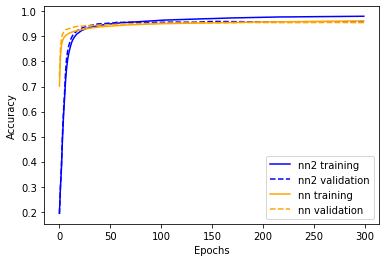

In [34]:
plt.plot(range(nn2.epochs), nn2.eval_['train_acc'], label='nn2 training', color='blue')
plt.plot(range(nn2.epochs), nn2.eval_['valid_acc'], label='nn2 validation', linestyle='--', color='blue')
plt.plot(range(nn.epochs), nn.eval_['train_acc'], label='nn training', color='orange')
plt.plot(range(nn.epochs), nn.eval_['valid_acc'], label='nn validation', linestyle='--', color='orange')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
plt.show()


A higher accuracy is achieved with the new 2 hidden layer MLP (deep neural network) in contrast to a 1 hidden layer MLP. 

The cost of the deep neural network after training is completed is also significantly lower.

The deep neural network does however, require more training to achieve optimal performance in contrast to a 1 hidden layer MLP.

We can improve on our current system by addressing bias in each layer, however this would require a different form of implementation.